#### Boosting & lightGBM

In [1]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

from   sklearn.linear_model    import LogisticRegression

from   sklearn.svm             import SVC 

from   sklearn.neighbors        import KNeighborsClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score  
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

- AdaBoost

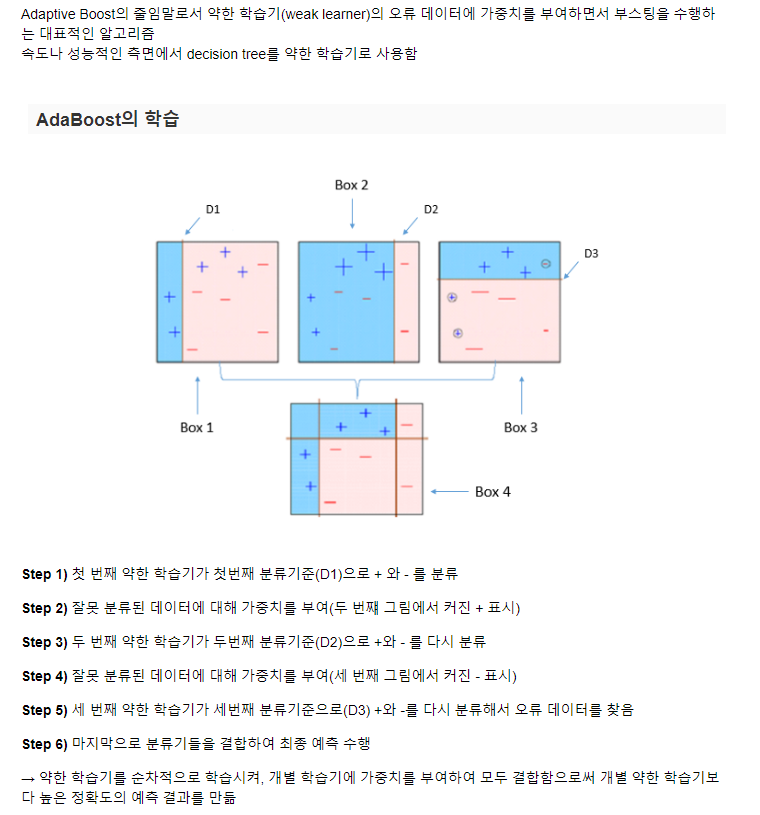

In [2]:
Image('c:/img/img/adaboost-01.png' , width = 700)

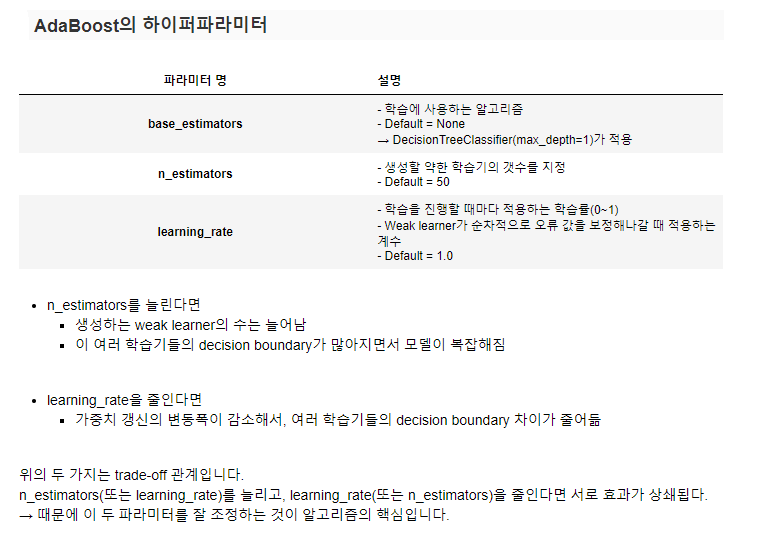

In [3]:
Image('c:/img/img/adaboost-02.png' , width = 700)

- XGBoost

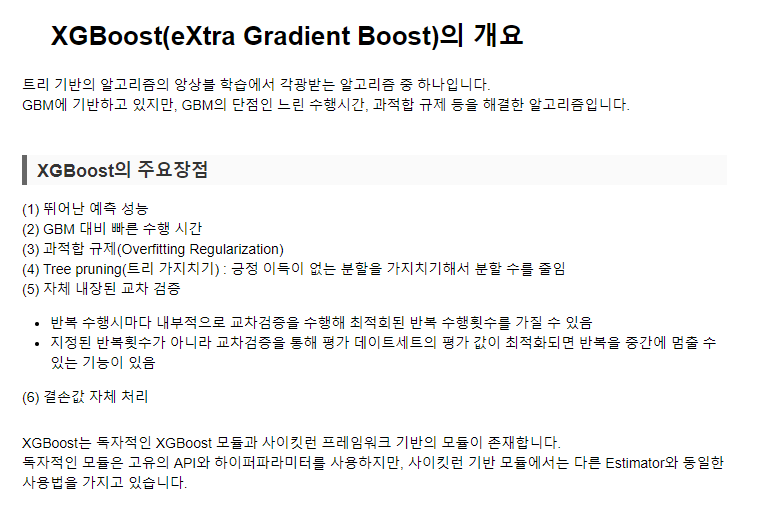

In [4]:
Image('c:/img/img/XGBoost-01.png' , width = 700)

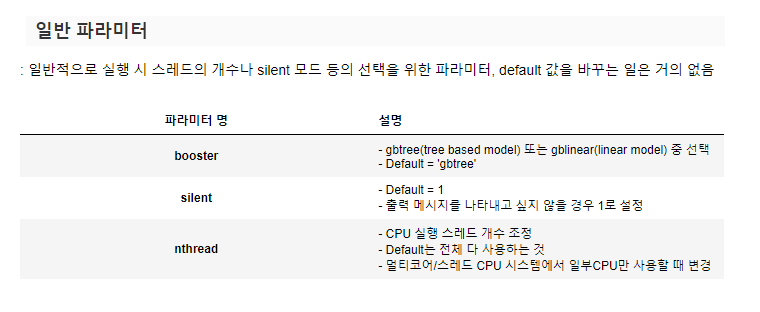

In [5]:
Image('c:/img/img/XGBoost-02.png' , width = 700)

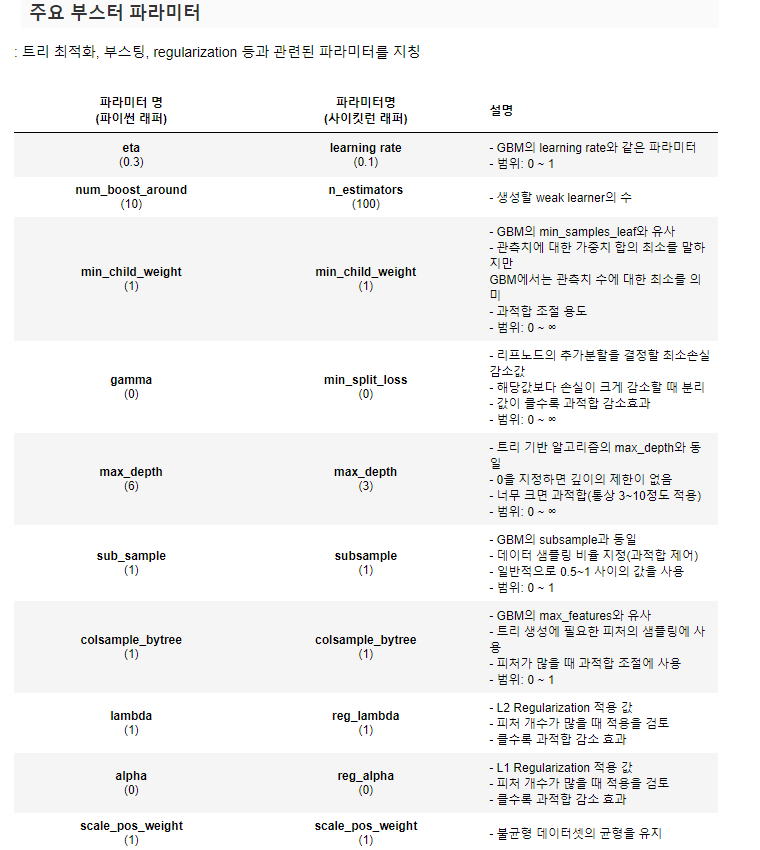

In [6]:
Image('c:/img/img/XGBoost-03.png' , width = 700)

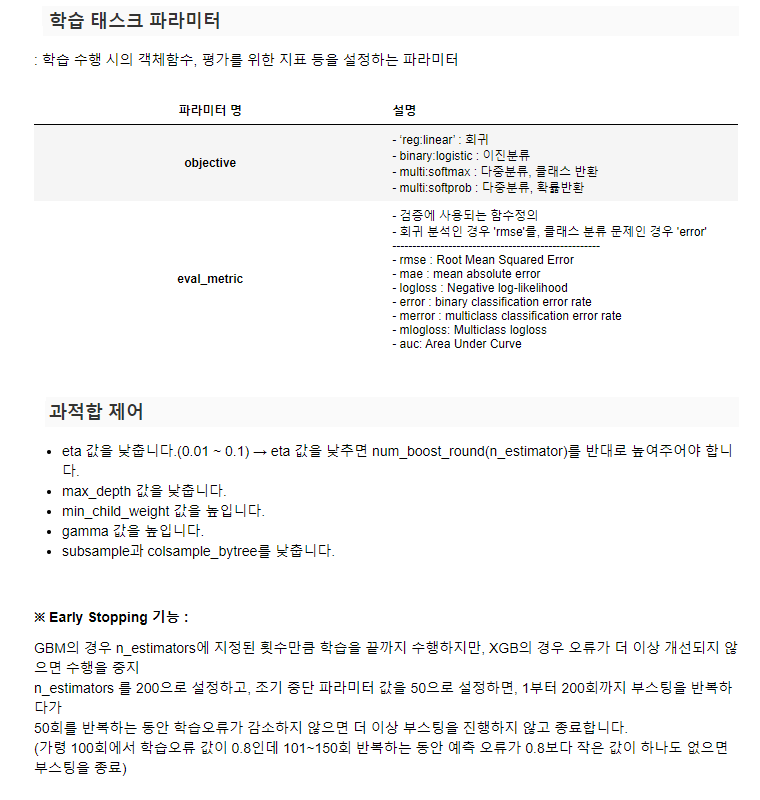

In [59]:
Image('c:/img/img/XGBoost-04.png' , width = 700)

- conda install -c conda-forge xgboost
- conda install -c conda-forge lightgbm
- https://xgboost.readthedocs.io/en/stable/python/python_intro.html



In [48]:
import xgboost as xgb
from   xgboost import XGBClassifier

print(xgb.__version__)

1.5.1


In [11]:
cancer = load_breast_cancer()
print(cancer.keys() )

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
def metrics_evaluation(target , prediction) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print()
    print('*' * 100)
    print('accuracy \n'    , accuracy_score(target , prediction))
    print()
    print('recall \n'      , recall_score(target , prediction))
    print()
    print('precision \n'   , precision_score(target , prediction))
    print()
    print('f1 score \n'   , f1_score(target , prediction))


In [17]:
print(cancer.target_names)


['malignant' 'benign']


In [18]:
cancer_frm = pd.DataFrame(data    = cancer.data , 
                          columns = cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [20]:
print( cancer.target_names )
print( cancer_frm['target'].value_counts() )

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [25]:
print('01. model 선정 - ')
xgboost_model = XGBClassifier(n_estimators  = 400 ,
                              learning_rate = 0.1 , 
                              max_depth     = 3)

xgboost_model.get_params()

01. model 선정 - 


{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 3,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 400,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [26]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , 
                                                       cancer.target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((455, 30), (114, 30), (455,), (114,))

In [27]:
xgboost_model.fit(X_train , y_train) 
y_pred = xgboost_model.predict(X_test) 
metrics_evaluation(y_test , y_pred)

[10:07:03] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix 
 [[46  3]
 [ 1 64]]

****************************************************************************************************
accuracy 
 0.9649122807017544

recall 
 0.9846153846153847

precision 
 0.9552238805970149

f1 score 
 0.9696969696969696


In [28]:
print('튜닝 - early stopping') 
tuning_xgboost_model = XGBClassifier(n_estimators  = 400 ,
                              learning_rate = 0.1 , 
                              max_depth     = 3)


튜닝 - early stopping


In [31]:
tuning_xgboost_model.fit(X_train , y_train , 
                         early_stopping_rounds = 100 , 
                         eval_metric = 'logloss' , 
                         eval_set = [(X_test , y_test)] , 
                         verbose = True )  


[0]	validation_0-logloss:0.61460
[1]	validation_0-logloss:0.55405
[2]	validation_0-logloss:0.49816
[3]	validation_0-logloss:0.44858
[4]	validation_0-logloss:0.40558
[5]	validation_0-logloss:0.37227
[6]	validation_0-logloss:0.34175
[7]	validation_0-logloss:0.31699
[8]	validation_0-logloss:0.29199
[9]	validation_0-logloss:0.27386
[10]	validation_0-logloss:0.25490
[11]	validation_0-logloss:0.23818
[12]	validation_0-logloss:0.22577
[13]	validation_0-logloss:0.21225
[14]	validation_0-logloss:0.20156
[15]	validation_0-logloss:0.19251
[16]	validation_0-logloss:0.18292
[17]	validation_0-logloss:0.17663
[18]	validation_0-logloss:0.17008
[19]	validation_0-logloss:0.16260
[20]	validation_0-logloss:0.15747
[21]	validation_0-logloss:0.15208
[22]	validation_0-logloss:0.14877
[23]	validation_0-logloss:0.14609
[24]	validation_0-logloss:0.14465
[25]	validation_0-logloss:0.14215
[26]	validation_0-logloss:0.13825
[27]	validation_0-logloss:0.13535
[28]	validation_0-logloss:0.13244
[29]	validation_0-loglos

[238]	validation_0-logloss:0.09305
[239]	validation_0-logloss:0.09291
[240]	validation_0-logloss:0.09316
[241]	validation_0-logloss:0.09301
[242]	validation_0-logloss:0.09287
[243]	validation_0-logloss:0.09301
[244]	validation_0-logloss:0.09292
[245]	validation_0-logloss:0.09292


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred = tuning_xgboost_model.predict(X_test) 
metrics_evaluation(y_test , y_pred)

confusion matrix 
 [[47  2]
 [ 1 64]]

****************************************************************************************************
accuracy 
 0.9736842105263158

recall 
 0.9846153846153847

precision 
 0.9696969696969697

f1 score 
 0.9770992366412214


피처 중요도 시각화 - 


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

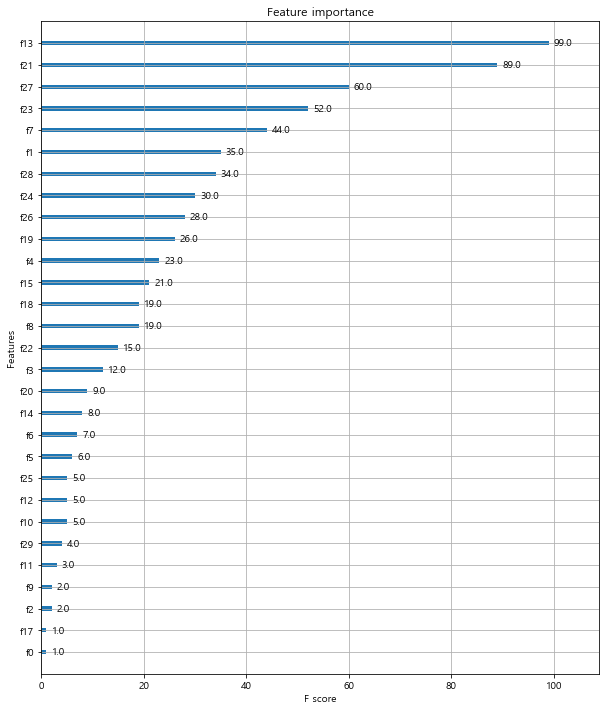

In [58]:
print('피처 중요도 시각화 - ')

fig , ax = plt.subplots( figsize = (10, 12))

xgb.plot_importance(tuning_xgboost_model , ax = ax )

- LightGBM 
- cancer prediction

In [56]:
from lightgbm import LGBMClassifier
import lightgbm as light

In [36]:
gbm_model =  LGBMClassifier(n_estimators  = 400 ,
                            learning_rate = 0.1 , 
                            max_depth     = 3)
gbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [37]:
gbm_model.fit(X_train , y_train , 
                         early_stopping_rounds = 100 , 
                         eval_metric = 'logloss' , 
                         eval_set = [(X_test , y_test)] , 
                         verbose = True ) 

[1]	valid_0's binary_logloss: 0.606017
[2]	valid_0's binary_logloss: 0.543372
[3]	valid_0's binary_logloss: 0.493337
[4]	valid_0's binary_logloss: 0.44766
[5]	valid_0's binary_logloss: 0.411436
[6]	valid_0's binary_logloss: 0.379522
[7]	valid_0's binary_logloss: 0.354103
[8]	valid_0's binary_logloss: 0.327011
[9]	valid_0's binary_logloss: 0.3033
[10]	valid_0's binary_logloss: 0.285218
[11]	valid_0's binary_logloss: 0.26974
[12]	valid_0's binary_logloss: 0.255245
[13]	valid_0's binary_logloss: 0.239979
[14]	valid_0's binary_logloss: 0.229394
[15]	valid_0's binary_logloss: 0.216446
[16]	valid_0's binary_logloss: 0.209389
[17]	valid_0's binary_logloss: 0.200332
[18]	valid_0's binary_logloss: 0.190267
[19]	valid_0's binary_logloss: 0.184193
[20]	valid_0's binary_logloss: 0.175653
[21]	valid_0's binary_logloss: 0.169701
[22]	valid_0's binary_logloss: 0.163806
[23]	valid_0's binary_logloss: 0.156058
[24]	valid_0's binary_logloss: 0.151248
[25]	valid_0's binary_logloss: 0.147774
[26]	valid_0'

LGBMClassifier(max_depth=3, n_estimators=400)

In [38]:
y_pred = gbm_model.predict(X_test)
metrics_evaluation(y_test , y_pred)

confusion matrix 
 [[47  2]
 [ 1 64]]

****************************************************************************************************
accuracy 
 0.9736842105263158

recall 
 0.9846153846153847

precision 
 0.9696969696969697

f1 score 
 0.9770992366412214


In [41]:
print('예측 확률값을 반환하고 예측값으로 변환 - ') 
y_pred_proba = gbm_model.predict_proba(X_test)[ : , 1]
y_pred_proba

예측 확률값을 반환하고 예측값으로 변환 - 


array([4.07387995e-04, 9.62311420e-01, 7.50879935e-03, 9.98599574e-01,
       9.96960540e-01, 9.94171032e-01, 7.40679863e-03, 5.83626601e-04,
       9.87453983e-01, 9.91618553e-01, 9.99585359e-01, 4.18317008e-04,
       5.94060617e-04, 3.88179580e-04, 9.99727618e-01, 2.04776935e-01,
       1.87329202e-02, 9.97991413e-01, 9.97988417e-01, 9.99232948e-01,
       2.55818866e-01, 9.99854903e-01, 3.36439243e-03, 2.74918620e-03,
       5.89388754e-03, 3.53540887e-04, 9.99509322e-01, 9.98475157e-01,
       9.99315651e-01, 9.99729345e-01, 9.88294796e-01, 8.80329565e-01,
       9.99722748e-01, 4.74985021e-04, 5.60029400e-04, 9.99423123e-01,
       9.99729253e-01, 9.99493981e-01, 9.99305768e-01, 4.35660568e-04,
       3.22282928e-03, 9.99772489e-01, 9.98830607e-01, 2.25471081e-03,
       9.98969634e-01, 3.18890824e-04, 9.97582280e-01, 9.96104688e-01,
       9.99774005e-01, 9.93695594e-01, 3.20760118e-01, 9.99474779e-01,
       9.91228750e-01, 1.71676568e-02, 9.84068466e-01, 9.38297008e-01,
      

In [42]:
print('AUC -  ' , roc_auc_score(y_test , y_pred_proba))

AUC -   0.996546310832025


피처 중요도 시각화 - 


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

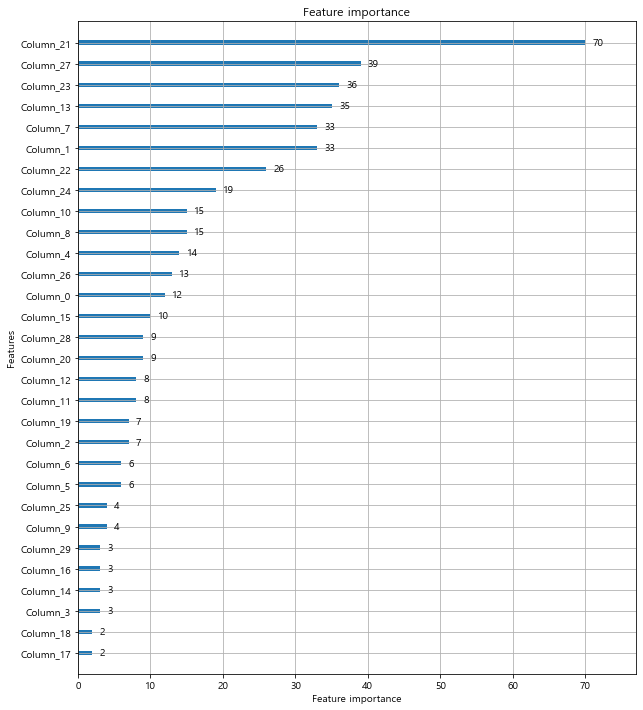

In [57]:
print('피처 중요도 시각화 - ')

fig , ax = plt.subplots( figsize = (10, 12))

light.plot_importance(gbm_model , ax = ax )

- classification-card.csv [실습]

In [60]:
card_frm = pd.read_csv('./ml-data/classification-card.csv')
card_frm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
card_frm.shape

(284807, 31)

In [102]:
card_copy_frm = card_frm.copy()

In [103]:
print('Time drop - ') 
card_copy_frm.drop('Time' , axis = 1  , inplace = True ) 
card_copy_frm.head()

Time drop - 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [104]:
print('데이터 세트 분리 - ')

card_target  = card_copy_frm['Class']
card_feature = card_copy_frm.drop('Class', axis = 1)

X_train , X_test , y_train , y_test = train_test_split(card_feature , 
                                                       card_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

print('학습, 테스트 데이터 세트의 레이블값 비율 - ') 
print('학습 - ')
print( y_train.value_counts() / y_train.shape[0] * 100 )
print()
print('테스트 - ')
print( y_test.value_counts() / y_test.shape[0] * 100 )



데이터 세트 분리 - 
학습, 테스트 데이터 세트의 레이블값 비율 - 
학습 - 
0    99.826198
1     0.173802
Name: Class, dtype: float64

테스트 - 
0    99.831467
1     0.168533
Name: Class, dtype: float64


In [105]:
def metrics_evaluation(target , prediction = None , prediction_prob = None) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print()
    print('accuracy \n'    , accuracy_score(target , prediction))
    print()
    print('recall \n'      , recall_score(target , prediction))
    print()
    print('precision \n'   , precision_score(target , prediction))
    print()
    print('f1 score \n'   , f1_score(target , prediction))
    print()
    print('AUC \n'        , roc_auc_score(target , prediction_prob))
        

In [106]:
print('LogisticRegression - 학습, 예측, 평가')
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:,1]

metrics_evaluation(y_test, y_pred, y_prob)

LogisticRegression - 학습, 예측, 평가
confusion matrix 
 [[56847    19]
 [   39    57]]

accuracy 
 0.9989817773252344

recall 
 0.59375

precision 
 0.75

f1 score 
 0.6627906976744186

AUC 
 0.9424201924993258


In [107]:
def model_train_eval(model , feature_train = None , feature_test = None , target_train = None , target_test = None) :
    model.fit(feature_train , target_train)
    pred       = model.predict(feature_test)
    pred_proba = model.predict_proba(feature_test)[ :  , 1]
    
    metrics_evaluation(target_test , pred , pred_proba ) 

In [108]:
print('LightGBM 학습/예측/평가 - ') 
print('레이블값이 불균형 분포를 이루는 경우 재현률 및 정밀도 , AUC 성능이 매우 저하됨을 확인 할 수 있다!!!')
gbm_model =  LGBMClassifier(n_estimators  = 400 ,
                            learning_rate = 0.1 , 
                            max_depth     = 3)
model_train_eval(gbm_model , feature_train = X_train , feature_test = X_test , target_train = y_train , target_test = y_test) 

LightGBM 학습/예측/평가 - 
레이블값이 불균형 분포를 이루는 경우 재현률 및 정밀도 , AUC 성능이 매우 저하됨을 확인 할 수 있다!!!
confusion matrix 
 [[55456  1410]
 [   69    27]]

accuracy 
 0.9740353217934764

recall 
 0.28125

precision 
 0.018789144050104383

f1 score 
 0.03522504892367905

AUC 
 0.5563071702188771


밀도분포를 이요한 금액에 대한 분포 시각화 - 


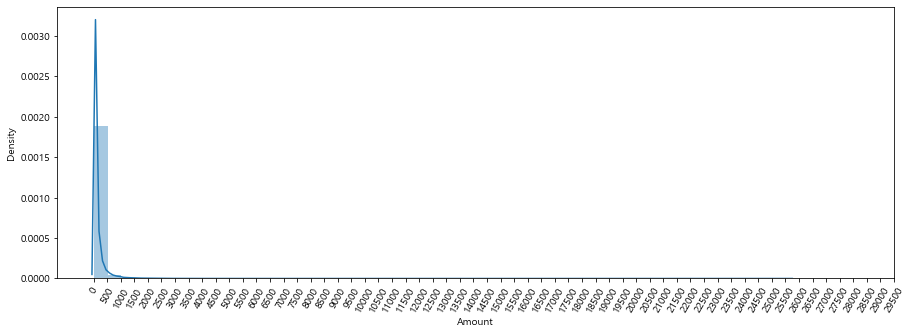

In [109]:
print('밀도분포를 이요한 금액에 대한 분포 시각화 - ') 

plt.figure( figsize = (15,5))

sns.distplot(card_copy_frm['Amount'])

plt.xticks(range(0, 30000, 500) , rotation = 60)
plt.show()
plt.close()

In [110]:
print('정규분포 형태의 StandardScaler 를 이용한 Amount(drop) 피처변환 -> Amount_Scaled - ') 
print('frm - insert(0 , feature_name , value )')
s_scaler = StandardScaler()
card_copy_frm['Amount_Scaled'] = s_scaler.fit_transform(card_copy_frm[['Amount']])
# card_copy_frm.drop('Amount', axis=1, inplace=True)
card_copy_frm.head()

정규분포 형태의 StandardScaler 를 이용한 Amount(drop) 피처변환 -> Amount_Scaled - 
frm - insert(0 , feature_name , value )


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [111]:
print('스케일 변환 후 기존 분류기를 활용해서 학습/예측/평가 - ')  

card_target  = card_copy_frm['Class']
card_feature = card_copy_frm.drop(['Amount' , 'Class'], axis = 1)

X_train , X_test , y_train , y_test = train_test_split(card_feature , 
                                                       card_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

logistic_model = LogisticRegression()
gbm_model      = LGBMClassifier(n_estimators  = 400 ,
                            learning_rate = 0.1 , 
                            max_depth     = 3)

print('Logistic - ')
model_train_eval(logistic_model , feature_train = X_train , feature_test = X_test , target_train = y_train , target_test = y_test) 
print()
print('*' * 100)
print()
print('GBM - ')
model_train_eval(gbm_model , feature_train = X_train , feature_test = X_test , target_train = y_train , target_test = y_test) 


스케일 변환 후 기존 분류기를 활용해서 학습/예측/평가 - 
Logistic - 
confusion matrix 
 [[56848    18]
 [   38    58]]

accuracy 
 0.9990168884519505

recall 
 0.6041666666666666

precision 
 0.7631578947368421

f1 score 
 0.6744186046511628

AUC 
 0.973203451974818

****************************************************************************************************

GBM - 
confusion matrix 
 [[56832    34]
 [   39    57]]

accuracy 
 0.998718443874864

recall 
 0.59375

precision 
 0.6263736263736264

f1 score 
 0.6096256684491979

AUC 
 0.796572204832413


In [99]:
print('로그 변환( np.log1p() ) - Amount ')
# card_copy_frm
amount_log = np.log1p( card_copy_frm['Amount'] )
# amount_log

card_copy_frm.insert(0, 'Amount_log' , amount_log)
card_copy_frm

로그 변환( np.log1p() ) - Amount 


,Amount_log,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled
0,5.014760,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.305626,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,5.939276,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,4.824306,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,4.262539,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.570980,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151
284803,3.249987,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117
284804,4.232366,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839
284805,2.397895,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249


In [112]:
print('로그 변환 후 기존 분류기를 활용해서 학습/예측/평가 - ')  

card_target  = card_copy_frm['Class']
card_feature = card_copy_frm.drop(['Amount' , 'Class' , 'Amount_Scaled'], axis = 1)

X_train , X_test , y_train , y_test = train_test_split(card_feature , 
                                                       card_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

logistic_model = LogisticRegression()
gbm_model      = LGBMClassifier(n_estimators  = 400 ,
                            learning_rate = 0.1 , 
                            max_depth     = 3)

print('Logistic - ')
model_train_eval(logistic_model , feature_train = X_train , feature_test = X_test , target_train = y_train , target_test = y_test) 
print()
print('*' * 100)
print()
print('GBM - ')
model_train_eval(gbm_model , feature_train = X_train , feature_test = X_test , target_train = y_train , target_test = y_test) 


로그 변환 후 기존 분류기를 활용해서 학습/예측/평가 - 
Logistic - 
confusion matrix 
 [[56848    18]
 [   38    58]]

accuracy 
 0.9990168884519505

recall 
 0.6041666666666666

precision 
 0.7631578947368421

f1 score 
 0.6744186046511628

AUC 
 0.9708867850150648

****************************************************************************************************

GBM - 
confusion matrix 
 [[51552  5314]
 [   65    31]]

accuracy 
 0.9055686246971665

recall 
 0.3229166666666667

precision 
 0.005799812909260992

f1 score 
 0.011394964160999815

AUC 
 0.5015555575094668


이상치 처리 관련 고민? - 


<AxesSubplot:>

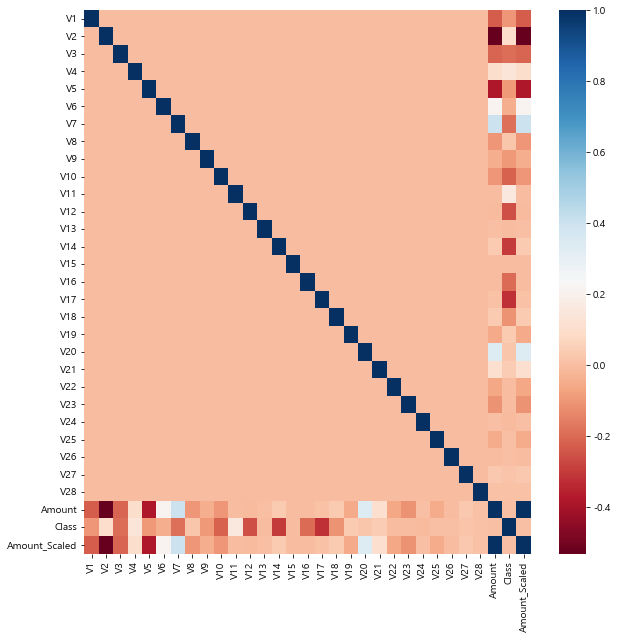

In [119]:
print('이상치 처리 관련 고민? - ')
plt.figure( figsize = (10, 10))
corr = card_copy_frm.corr()
sns.heatmap(corr , cmap = 'RdBu')

- smote 오버 샘플링
- 학습데이터만으로 샘플링하여야 한다!!

In [120]:
from imblearn.over_sampling import SMOTE

In [124]:
smote = SMOTE(random_state = 100)
X_train_over , y_train_over = smote.fit_sample(X_train , y_train)
print('over shape - ' ,  X_train_over.shape , y_train_over.shape)
print('shape      - ' ,  X_train.shape , y_train.shape)

over shape -  (454898, 28) (454898,)
shape      -  (227845, 28) (227845,)


In [129]:
print('샘플링 변환 후 기존 분류기를 활용해서 학습/예측/평가 - ')  

card_target  = card_copy_frm['Class']
card_feature = card_copy_frm.drop(['Amount' , 'Class' , 'Amount_Scaled'], axis = 1)

X_train , X_test , y_train , y_test = train_test_split(card_feature , 
                                                       card_target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

logistic_model = LogisticRegression()
gbm_model      = LGBMClassifier(n_estimators  = 1000 ,
                                learning_rate = 0.1 , 
                                max_depth     = 3 , 
                                num_leaves    = 64)

print('Logistic - ')
model_train_eval(logistic_model , feature_train = X_train_over , feature_test = X_test , target_train = y_train_over , target_test = y_test) 
print()
print('*' * 100)
print()
print('GBM - ')
model_train_eval(gbm_model , feature_train = X_train_over , feature_test = X_test , target_train = y_train_over , target_test = y_test) 


샘플링 변환 후 기존 분류기를 활용해서 학습/예측/평가 - 
Logistic - 
confusion matrix 
 [[55582  1284]
 [   11    85]]

accuracy 
 0.9772655454513536

recall 
 0.8854166666666666

precision 
 0.0620891161431702

f1 score 
 0.11604095563139932

AUC 
 0.9678633212288539

****************************************************************************************************

GBM - 
confusion matrix 
 [[56375   491]
 [   17    79]]

accuracy 
 0.9910817738141217

recall 
 0.8229166666666666

precision 
 0.13859649122807016

f1 score 
 0.2372372372372372

AUC 
 0.9261317175465128


- classification_bank_train.csv
- classification_bank_test.csv

고객 만족 데이터 파일 [실습]